In [1]:
# importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# load_dataset("lukebarousse/data_jobs")

In [3]:
data = load_dataset("lukebarousse/data_jobs")

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [4]:
df = data["train"].to_pandas()
# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.loc[:,"job_skills"] = df.loc[:,"job_skills"].apply(func=(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list))
df_exploded = df.explode(column="job_skills").copy()

In [5]:
del df
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3777320 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   job_title_short        object        
 1   job_title              object        
 2   job_location           object        
 3   job_via                object        
 4   job_schedule_type      object        
 5   job_work_from_home     bool          
 6   search_location        object        
 7   job_posted_date        datetime64[ns]
 8   job_no_degree_mention  bool          
 9   job_health_insurance   bool          
 10  job_country            object        
 11  salary_rate            object        
 12  salary_year_avg        float64       
 13  salary_hour_avg        float64       
 14  company_name           object        
 15  job_skills             object        
 16  job_type_skills        object        
dtypes: bool(3), datetime64[ns](1), float64(2), object(11)
memory usage: 443

In [6]:
df_skill_count = (df_exploded
                  .groupby(by=["job_title_short", "job_skills"])
                  .size()
                  .reset_index()
                  .rename(columns={0:"skill_count"})
                  .sort_values(by="skill_count", ascending=False))

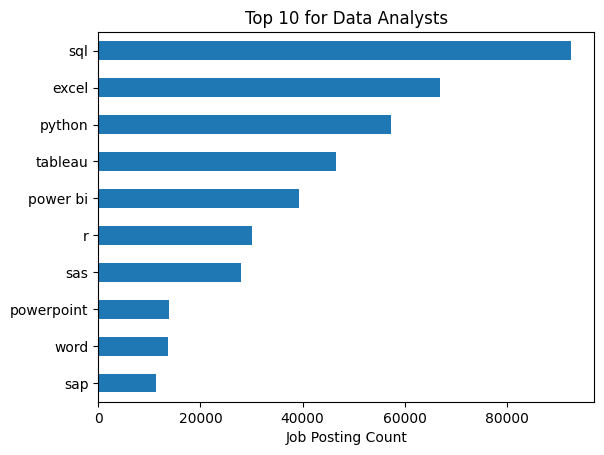

In [7]:
job_title = "Data Analyst"
top_skills_count = 10
role_top_skills = df_skill_count[df_skill_count["job_title_short"] == job_title].head(top_skills_count)
role_top_skills.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills_count} for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

# Excercise - Investigate Trending Skills

In [8]:
df_DS = df_exploded[df_exploded["job_title_short"] == "Data Scientist"].copy()

In [9]:
df_DS["job_posted_month_no"] = df_DS["job_posted_date"].dt.month

In [10]:
df_DS_pv = df_DS.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_DS_pv

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [11]:
# df_DS_pv.sum()
df_DS_pv.loc["Total"] = df_DS_pv.sum()

In [12]:
df_DS_pv = df_DS_pv.T.sort_values(by="Total", ascending=False).T
df_DS_pv.drop(index="Total", inplace=True)

In [13]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_DS_pv.index = df_DS_pv.index.map(month_map)

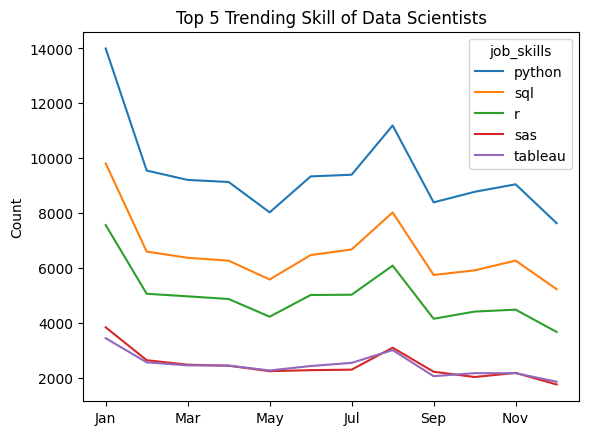

In [14]:
df_DS_pv.iloc[:,:5].plot()
plt.title("Top 5 Trending Skill of Data Scientists")
plt.ylabel("Count")
plt.xlabel("")
plt.show()

# Ploting Top Job Postings

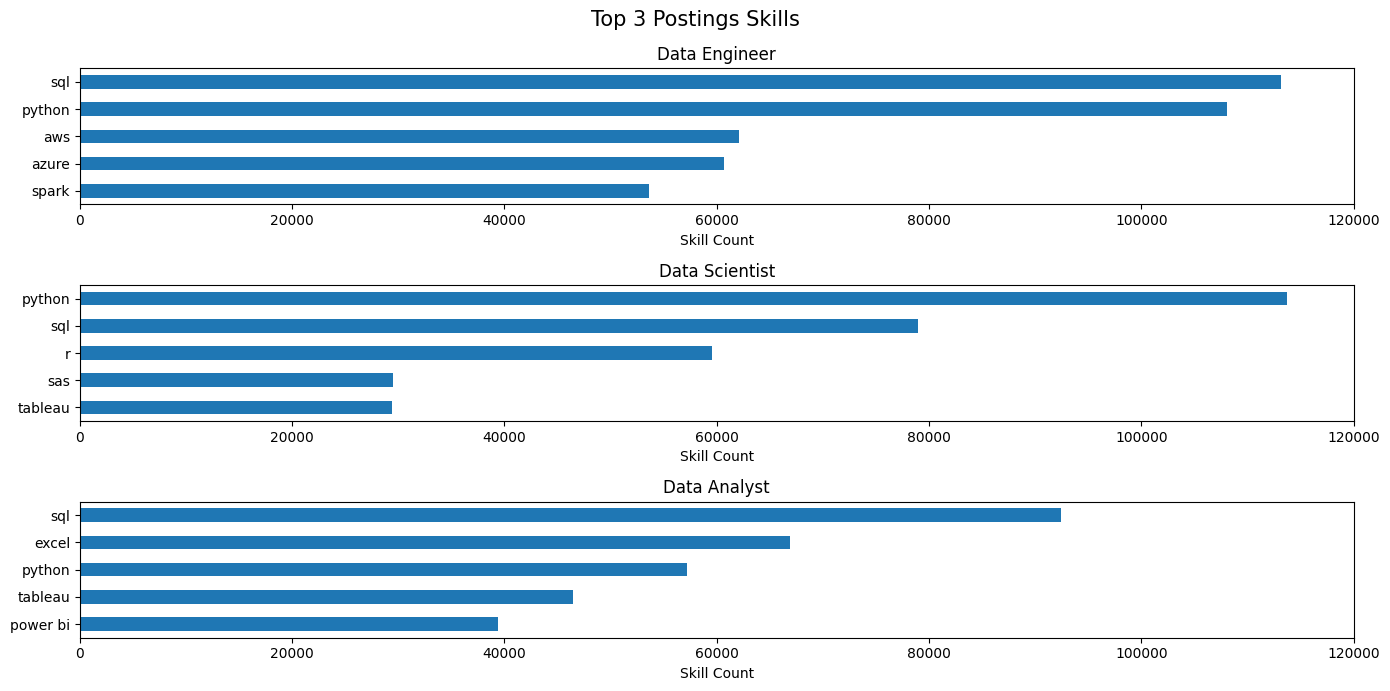

In [15]:
top_posts_count = 3
top_job_postings = df_exploded["job_title_short"].value_counts().sort_values(ascending=False).head(top_posts_count).index.to_list()
fig, ax = plt.subplots(3,1, figsize=(14, 7))
for i,job_title in enumerate(top_job_postings):
    df_role = df_exploded[df_exploded["job_title_short"] == job_title]
    df_role_skill_count = df_role["job_skills"].value_counts()
    df_role_skill_count.head(5).plot(kind="barh", ax=ax[i], title=job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("Skill Count")
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 120000)
fig.suptitle("Top 3 Postings Skills", fontsize=15)
fig.tight_layout()


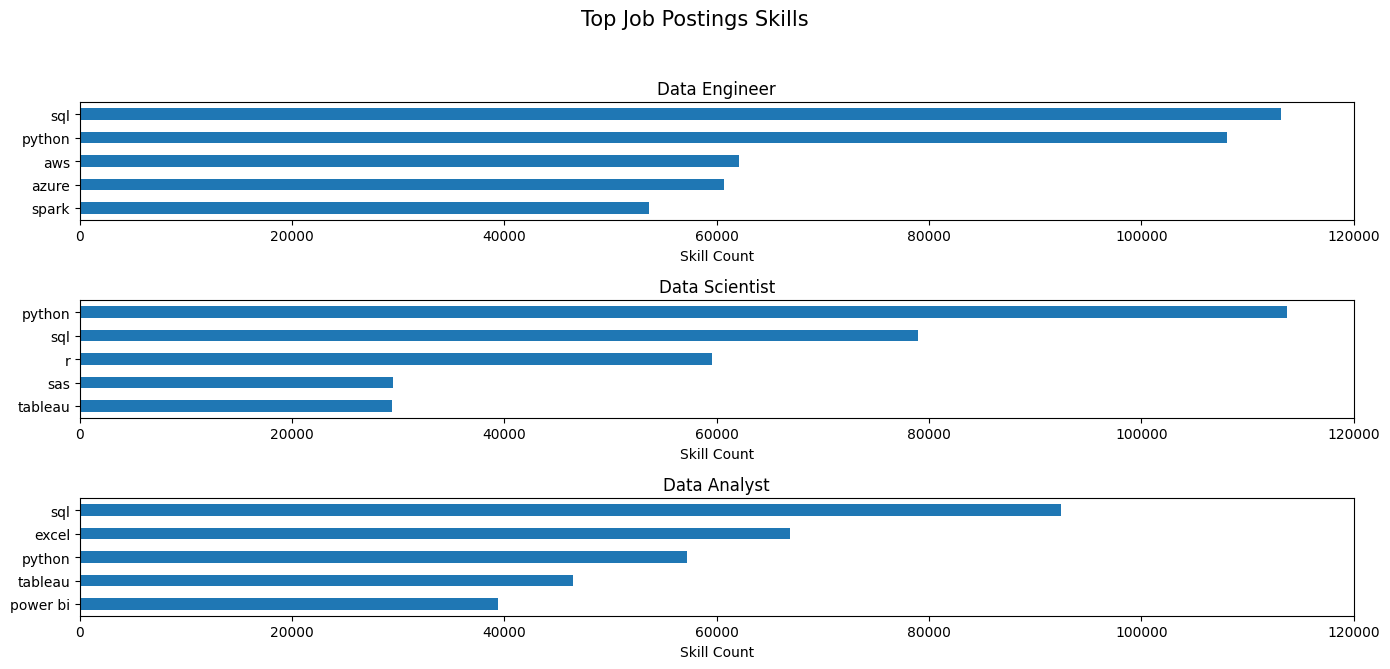

In [16]:
import matplotlib.pyplot as plt

def plot_top_job_skills(df, top_n=3, xlim=(0, 120000)):
    # Get the top job postings
    top_job_titles = df["job_title_short"].value_counts().head(top_n).index.to_list()
    
    fig, ax = plt.subplots(top_n, 1, figsize=(14, 7))
    
    for i, job_title in enumerate(top_job_titles):
        df_filtered = df[df["job_title_short"] == job_title]
        skill_counts = df_filtered["job_skills"].value_counts().head(5)
        
        skill_counts.plot(kind="barh", ax=ax[i], title=job_title)
        ax[i].set_ylabel("")
        ax[i].set_xlabel("Skill Count")
        ax[i].invert_yaxis()
        ax[i].set_xlim(*xlim)  # Set x-axis limits dynamically
    
    fig.suptitle("Top Job Postings Skills", fontsize=15)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

# Usage
plot_top_job_skills(df_exploded)

# Excercise - Top Companies hires for roles of ?

In [23]:
companies =  df_exploded["company_name"].value_counts().head(5).index.to_list()
companies

['Emprego', 'Capital One', 'Booz Allen Hamilton', 'Dice', 'Walmart']

In [31]:
df_companies_pvt = df_exploded.pivot_table(index="company_name", columns="job_title_short", aggfunc="size", fill_value=0).loc[companies]

In [35]:
df_companies_pvt.loc["Total"] = df_companies_pvt.sum()

In [45]:
df_companies_pvt_top_n = df_companies_pvt.T.sort_values(by="Total", ascending=False).T.drop(index="Total")

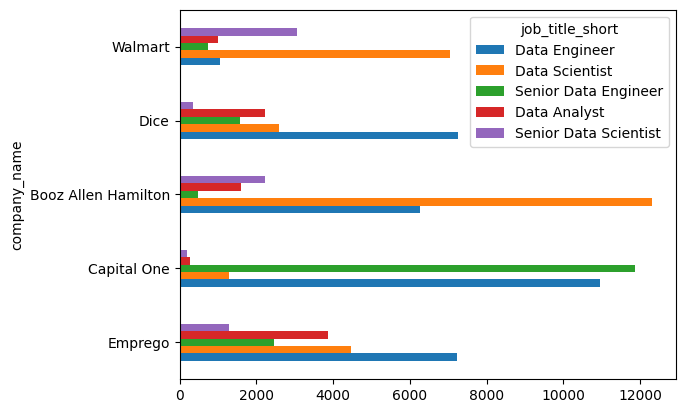

In [51]:
df_top_n_company_roles = df_companies_pvt_top_n.iloc[:,:5]
df_top_n_company_roles.plot(kind="barh")
plt.show()

In [55]:
df_top_n_company_roles.loc[companies[0]]

job_title_short
Data Engineer            7238
Data Scientist           4475
Senior Data Engineer     2450
Data Analyst             3866
Senior Data Scientist    1291
Name: Emprego, dtype: int64

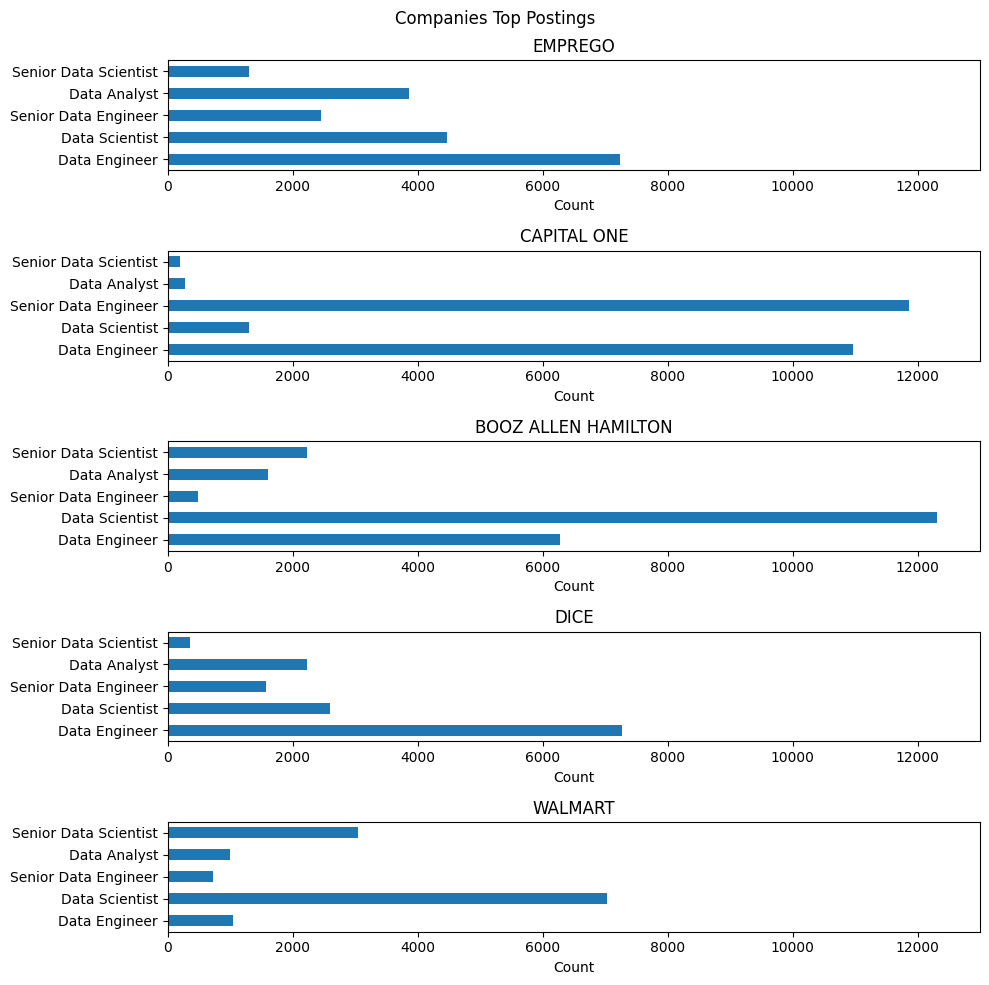

In [75]:
fig, ax = plt.subplots(5,1, figsize=(10,10))
for i,company in enumerate(companies):
    df_top_n_company_roles.loc[company].plot(kind="barh", ax=ax[i])
    ax[i].set_xlim(0,13000)
    ax[i].set_title(company.upper())
    ax[i].set_xlabel("Count")
    ax[i].set_ylabel("")
    
fig.suptitle("Companies Top Postings")
fig.tight_layout()
plt.show()